In [80]:
import pandas as pd
import numpy as np

In [81]:
resident_apart = pd.read_csv('G:/내 드라이브/ESC-22FALL/빅콘테스트/Preprocessed Data/resident_apart.csv', encoding='cp949')
resident_notapart = pd.read_csv('G:/내 드라이브/ESC-22FALL/빅콘테스트/Preprocessed Data/resident_notapart.csv', encoding='cp949')
activity_data = pd.read_csv('G:/내 드라이브/ESC-22FALL/빅콘테스트/Preprocessed Data/activity_final_data.csv', encoding='cp949')
adng_car_registration = pd.read_csv('G:/내 드라이브/ESC-22FALL/빅콘테스트/Preprocessed Data/car_registration_utf8.csv', encoding='utf-8')

In [82]:
resident_apart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159085 entries, 0 to 159084
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    159085 non-null  int64  
 1   date          159085 non-null  int64  
 2   dow           159085 non-null  int64  
 3   gender        159085 non-null  int64  
 4   age           159085 non-null  int64  
 5   time_zone     159085 non-null  int64  
 6   app_web       159085 non-null  object 
 7   count_cust    159085 non-null  float64
 8   cell_xcrd     159085 non-null  float64
 9   cell_ycrd     159085 non-null  float64
 10  address       159085 non-null  object 
 11  apart_number  159085 non-null  int64  
 12  adng_nm       159085 non-null  object 
 13  cell_id       159085 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 17.0+ MB


In [83]:
resident_notapart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132958 entries, 0 to 132957
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    132958 non-null  int64  
 1   date          132958 non-null  int64  
 2   dow           132958 non-null  int64  
 3   gender        132958 non-null  int64  
 4   age           132958 non-null  int64  
 5   time_zone     132958 non-null  int64  
 6   app_web       132958 non-null  object 
 7   count_cust    132958 non-null  float64
 8   cell_xcrd     132958 non-null  float64
 9   cell_ycrd     132958 non-null  float64
 10  address       132931 non-null  object 
 11  apart_number  132958 non-null  int64  
 12  adng_nm       132958 non-null  object 
 13  cell_id       132958 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 14.2+ MB


In [84]:
activity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457270 entries, 0 to 457269
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  457270 non-null  int64  
 1   date        457270 non-null  int64  
 2   dow         457270 non-null  int64  
 3   gender      457270 non-null  int64  
 4   age         457270 non-null  int64  
 5   time_zone   457270 non-null  int64  
 6   app_web     457270 non-null  object 
 7   count_cust  457270 non-null  float64
 8   adng_nm     457270 non-null  object 
 9   cell_id     457270 non-null  int64  
 10  cell_xcrd   457270 non-null  float64
 11  cell_ycrd   457270 non-null  float64
dtypes: float64(3), int64(7), object(2)
memory usage: 41.9+ MB


In [85]:
adng_car_registration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   adng_nm       29 non-null     object
 1   registration  29 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 592.0+ bytes


In [86]:
adng_car_registration.loc[0, 'registration']

14602

## 전기차 등록 대수 비율 계수 생성

In [87]:
import re

# XX1동과 같이 숫자가 포함된 행정동에서 숫자 제거
def adng_combine(adng_nm):
    new_adng_nm = re.sub(r"[0-9]", "", adng_nm)
    return new_adng_nm

In [88]:
resident_apart['adng_nm2'] = resident_apart.apply(lambda row: adng_combine(row['adng_nm']), axis=1)
resident_notapart['adng_nm2'] = resident_notapart.apply(lambda row: adng_combine(row['adng_nm']), axis=1)

In [89]:
# 법정동 별 Groupby, count_cust의 총합 계산
apart_adng_electric_cust = resident_apart.groupby('adng_nm2')['count_cust'].sum()
adng_car_registration['apart_electric'] = 0
for i in range(len(apart_adng_electric_cust)):
    adng_car_registration.loc[adng_car_registration['adng_nm'] == apart_adng_electric_cust.index[i], 'apart_electric'] = apart_adng_electric_cust[i]

notapart_adng_electric_cust = resident_notapart.groupby('adng_nm2')['count_cust'].sum()
adng_car_registration['notapart_electric'] = 0
for i in range(len(notapart_adng_electric_cust)):
    adng_car_registration.loc[adng_car_registration['adng_nm'] == notapart_adng_electric_cust.index[i], 'notapart_electric'] = notapart_adng_electric_cust[i]

<AxesSubplot:>

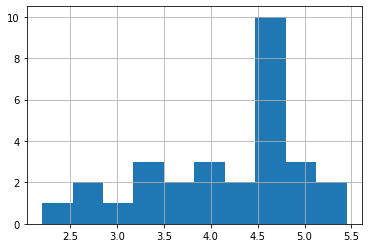

In [90]:
# 아파트와 비아파트 데이터 결합
adng_car_registration['total_electric'] = adng_car_registration['apart_electric'] + adng_car_registration['notapart_electric']
# 전기차/자동차 비율 계산
adng_car_registration['electric_ratio'] = adng_car_registration.apply(lambda row: row['total_electric']/row['registration'], axis=1)
adng_car_registration['electric_ratio'].hist()

<AxesSubplot:>

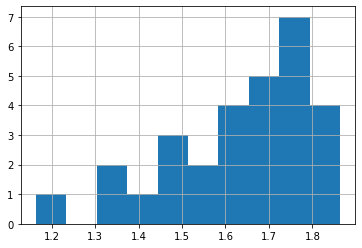

In [91]:
# apply log transform to right_skewed data to make like normal dist.
adng_car_registration['log_ratio'] = np.log1p(adng_car_registration['electric_ratio'])
adng_car_registration['log_ratio'].hist()

In [92]:
# Use StandardScaler for scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
adng_car_registration['Z_log_ratio']= scaler.fit_transform(np.array(adng_car_registration['log_ratio']).reshape(-1,1))

#make ratio_coef
adng_car_registration['ratio_coef'] = 0
for i in adng_car_registration.index:
    Z_log_ratio = adng_car_registration.loc[i, 'Z_log_ratio']
    # for Z_log_ratio>0, return ratio_coef=1
    if Z_log_ratio > 0:
        adng_car_registration.loc[i, 'ratio_coef'] = 1
    # for -2 < Z_log_ratio < 0, return ratio_coef = 1 - Z_log_ratio/10
    elif Z_log_ratio > -2:
        adng_car_registration.loc[i, 'ratio_coef'] = 1 - Z_log_ratio/10
    # for Z_log_ratio<-2, return ratio_coef = 1.2
    else:
        adng_car_registration.loc[i, 'ratio_coef'] = 1.2

adng_car_registration

,adng_nm,registration,apart_electric,notapart_electric,total_electric,electric_ratio,log_ratio,Z_log_ratio,ratio_coef
0,포곡읍,14602,7012.919,53016.389,60029.308,4.111033,1.631402,0.012104,1.000000
1,모현읍,12878,2852.236,56315.644,59167.880,4.594493,1.721783,0.541966,1.000000
2,이동읍,9848,8288.529,24374.581,32663.110,3.316725,1.462497,-0.978104,1.097810
3,남사읍,11548,14048.488,18827.860,32876.348,2.846930,1.347275,-1.653594,1.165359
4,원삼면,4144,0.000,19189.782,19189.782,4.630739,1.728241,0.579826,1.000000
5,백암면,3855,0.000,8487.501,8487.501,2.201686,1.163678,-2.729941,1.200000
6,양지면,10054,273.048,39888.784,40161.832,3.994612,1.608360,-0.122980,1.012298
7,중앙동,11619,7248.046,35052.776,42300.822,3.640659,1.534856,-0.553895,1.055389
8,역삼동,18791,42334.770,41100.079,83434.849,4.440149,1.693807,0.377954,1.000000
9,유림동,15573,20906.372,40700.406,61606.778,3.955999,1.600599,-0.168478,1.016848


In [93]:
# 생성한 전기차 비율 계수를 아파트/비아파트 데이터 count_cust에 적용
coef_dict = {}
for i in adng_car_registration.index:
    coef_dict[adng_car_registration.loc[i, 'adng_nm']] = adng_car_registration.loc[i, 'ratio_coef']
# 전기차 비율 계수가 적용된 adj_count_cust
resident_apart['adj_count_cust'] = resident_apart.apply(lambda row: row['count_cust']*coef_dict[row['adng_nm2']], axis=1)
resident_apart

,Unnamed: 0,date,dow,gender,age,time_zone,app_web,count_cust,cell_xcrd,cell_ycrd,address,apart_number,adng_nm,cell_id,adng_nm2,adj_count_cust
0,0,5,7,1,6,5,EV라운지,3.522,127.152250,37.286300,경기도 용인시 기흥구 동백8로 9,436,동백1동,86135034,동백동,3.522000
1,1,25,6,1,8,2,파워큐브차저,4.231,127.090080,37.309536,경기도 용인시 수지구 만현로67번길 19,213,상현2동,84375196,상현동,4.231000
2,2,19,7,1,13,2,EV라운지,4.335,127.080970,37.323480,경기도 용인시 수지구 신봉1로48번길 32,151,신봉동,84119243,신봉동,4.335000
3,3,10,5,0,13,3,EV라운지,8.648,127.230800,37.246840,경기도 용인시 처인구 한터로152번길 45,566,유림동,88358807,유림동,8.793700
4,4,20,1,1,3,3,EV라운지,12.090,127.071450,37.310825,경기도 용인시 수지구 성복1로 35,3,성복동,83847232,성복동,12.090000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159080,159080,26,7,1,14,5,파워큐브차저,8.530,127.195300,37.242702,경기도 용인시 처인구 낙은로 59,63,역삼동,87350861,역삼동,8.530000
159081,159081,20,1,1,13,4,EV라운지,3.912,127.109030,37.244700,경기도 용인시 기흥구 한보라2로 168,264,기흥동,84903019,기흥동,4.650810
159082,159082,5,7,1,2,3,EV라운지,5.082,127.079384,37.304993,경기도 용인시 수지구 상현로 59,183,상현1동,84071205,상현동,5.082000
159083,159083,11,6,1,13,2,EV라운지,6.452,127.170300,37.156097,경기도 용인시 처인구 남사읍 한숲로 83,39,남사읍,86630714,남사읍,7.518899


In [94]:
resident_notapart['adj_count_cust'] = resident_notapart.apply(lambda row: row['count_cust']*coef_dict[row['adng_nm2']], axis=1)
resident_notapart

,Unnamed: 0,date,dow,gender,age,time_zone,app_web,count_cust,cell_xcrd,cell_ycrd,address,apart_number,adng_nm,cell_id,adng_nm2,adj_count_cust
0,0,14,2,0,14,1,EV라운지,18.440,127.216600,37.274303,경기 용인시 처인구 포곡읍 둔전리 42-2,0,포곡읍,87958893,포곡읍,18.440000
1,1,24,5,1,8,4,EV라운지,4.231,127.091780,37.306840,경기 용인시 수지구 상현동 산 13-6,0,상현2동,84423187,상현동,4.231000
2,2,12,7,1,12,5,EV라운지,7.448,127.107216,37.269030,경기도 용인시 기흥구 상갈로29번길 10,0,상갈동,84855076,상갈동,7.448000
3,3,20,1,0,12,4,EV라운지,22.800,127.101250,37.331207,경기 용인시 수지구 풍덕천동 764,0,풍덕천1동,84695224,풍덕천동,22.800000
4,4,9,4,1,12,3,EV라운지,11.535,127.200400,37.234150,경기도 용인시 처인구 금령로40번길 8,0,중앙동,87494833,중앙동,12.173918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132953,132953,6,1,0,10,2,EV라운지,3.629,127.194190,37.236390,경기도 용인시 처인구 중부대로1343번길 11-3,0,역삼동,87318849,역삼동,3.629000
132954,132954,17,5,1,3,3,EV라운지,4.463,127.238070,37.263084,경기 용인시 처인구 포곡읍 금어리 527,0,포곡읍,88566830,포곡읍,4.463000
132955,132955,10,5,0,10,5,EV라운지,3.227,127.101160,37.241520,경기 용인시 기흥구 공세동 476-343,0,기흥동,84679026,기흥동,3.836443
132956,132956,7,2,1,3,6,EV라운지,4.585,127.193080,37.234580,경기 용인시 처인구 김량장동 508-1,0,중앙동,87286847,중앙동,4.838961
